<a href="https://colab.research.google.com/github/Jagannath8/GoeduHub-Training/blob/main/Assignment_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GO_STP_579 -> Jagannath Pal**

# ***Assignment_14***


---


Practice KNN - We have a dataset that contains multiple user's information through the social network who are interested in buying SUV Car or not. 



# Importing Libraries

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Reading the Data

In [111]:
df = pd.read_csv("/content/User_Data.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Understanding the Data

In [112]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [113]:
df.shape

(400, 5)

In [114]:
df.size

2000

In [115]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [117]:
df.max()

User ID            15815236
Gender                 Male
Age                      60
EstimatedSalary      150000
Purchased                 1
dtype: object

In [118]:
df.min()

User ID            15566689
Gender               Female
Age                      18
EstimatedSalary       15000
Purchased                 0
dtype: object

In [119]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [120]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [121]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [122]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


# Visualization

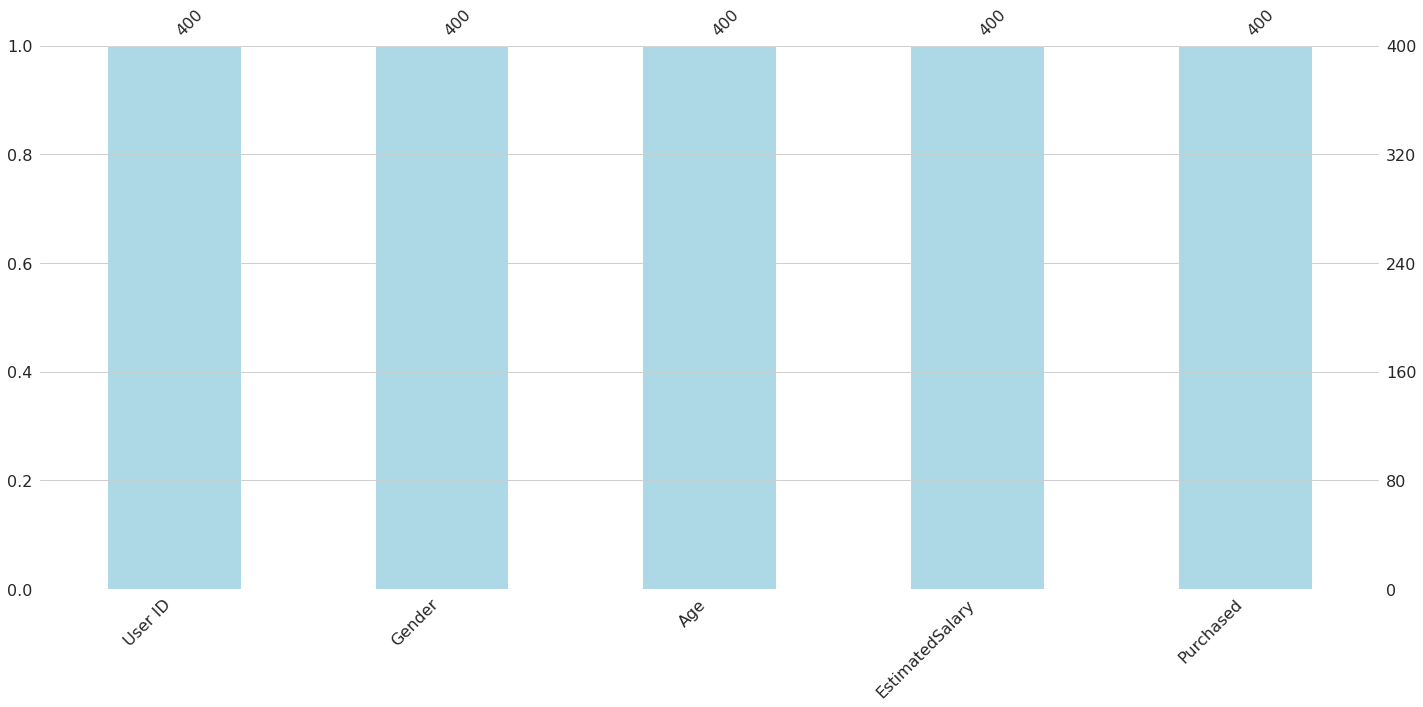

In [123]:
import missingno as no
no.bar(df, color='lightblue')
plt.show()

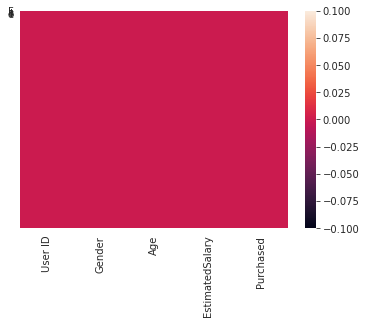

In [124]:
sns.heatmap(df.isnull(), yticklabels='False')

In [125]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

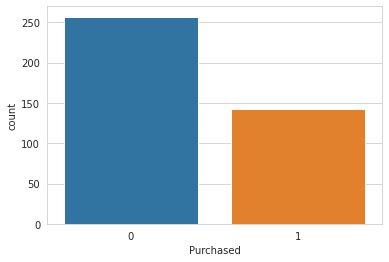

In [126]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased', data=df)

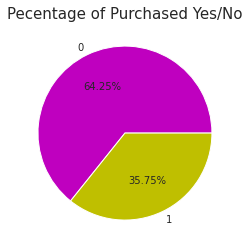

In [127]:
df1 = df['Purchased'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%', colors='my')
plt.title('Pecentage of Purchased Yes/No', fontsize=15)
plt.show()

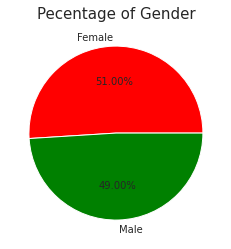

In [128]:
df2 = df['Gender'].value_counts()
plt.pie(df2.values, labels=df2.index, autopct='%0.2f%%', colors='rg')
plt.title('Pecentage of Gender', fontsize=15)
plt.show()

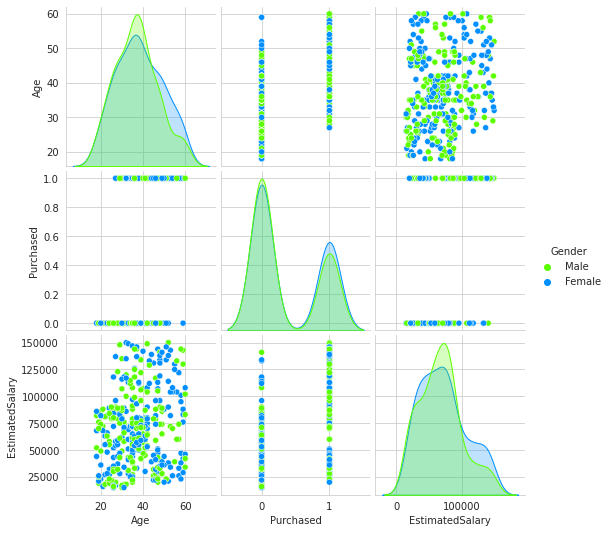

In [129]:
sns.pairplot(df,hue='Gender',vars=['Age','Purchased','EstimatedSalary'],palette='gist_rainbow')

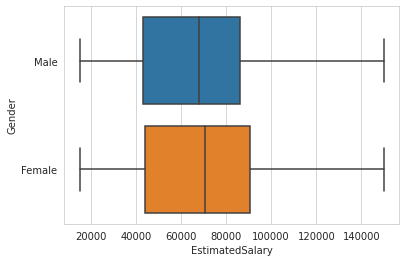

In [130]:
sns.boxplot(x='EstimatedSalary',y='Gender',data=df)
plt.show()

<Figure size 1800x1080 with 0 Axes>

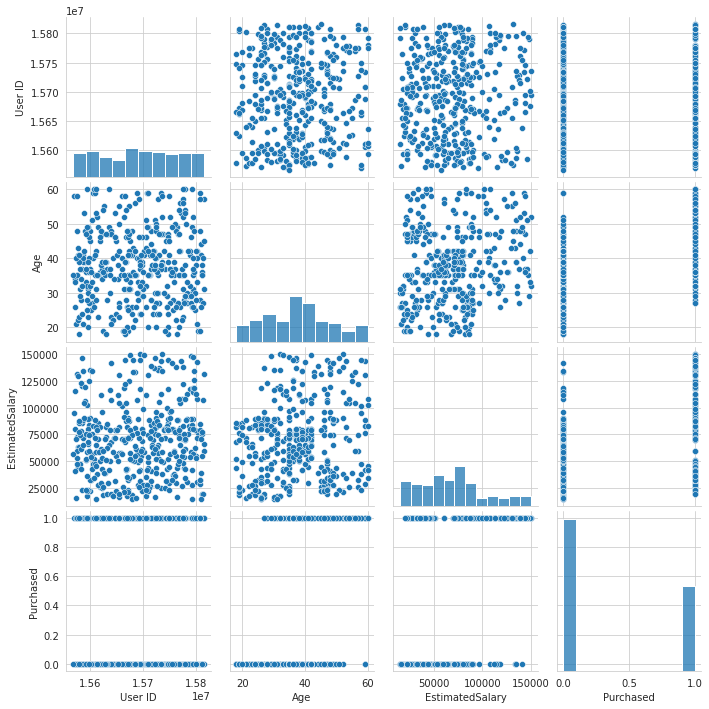

In [131]:
plt.figure(figsize=(25,15))
sns.pairplot(data=df)
plt.show()

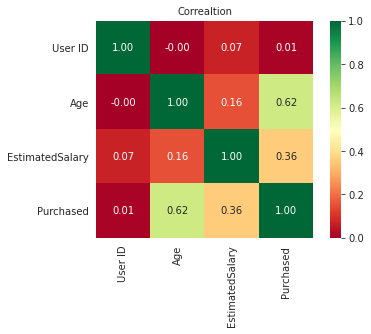

In [132]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True, cmap="RdYlGn")
plt.title("Correaltion", size=10)
plt.show()

# Label Encoding

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Gender.head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int64

# Splitting the Data into Dependent and Indpendent variables

In [235]:
x = df.drop(['Purchased', 'User ID'],axis='columns')
y = df['Purchased']

In [236]:
x[:5]

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [237]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [238]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10)

In [239]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [240]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Prediction

In [241]:
ypred = knn.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

# Confusion Matrix

In [242]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
ypred = knn.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)

[[47  5]
 [ 7 21]]


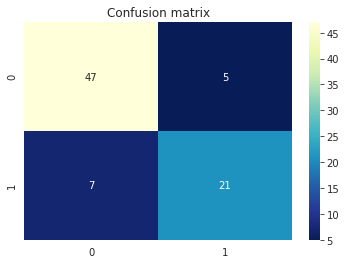

In [243]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu_r" ,fmt='g')
plt.title('Confusion matrix', y=5.1)
plt.show()

# Accuracy

In [244]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest, ypred)
ac

0.85

# New Prediction

In [251]:
x_new = np.array([[0, 41, 23000]])
prediction = knn.predict(x_new)
prediction

array([1])



---

